In [64]:
#To start of by importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [65]:
#Importing Model building and Evaluation related libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
#Importing the dataset

bike = pd.read_csv(r'C:\Users\Pranav.Kavishwar\Downloads\day.csv')

In [67]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [68]:
bike.shape

(730, 16)

There are 730 rows and 16 columns in the dataset

In [69]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [70]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [71]:
bike.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

Here, we can see that variables like 'season', 'yr', 'month', 'holiday', 'weekday', 'workingday' and 'weathersit' have very less and are classified as categorical variables. Rest are numerical variables.  

In [72]:
#Create separate lists for categorical and numerical variables 

categorical = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
numerical = ['temp','atemp','hum','windspeed','casual','registered']

Now let's in order to analyze the relation of categorical variables with the dependent variable, we'll convert them into their original mapped values using the data dictionary given.

As per data dictionary below are the values
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [73]:
#Mapping the categorical variables

bike.season = bike.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})

bike.mnth = bike.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

bike.weekday = bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

bike.weathersit = bike.weathersit.map({1:'clear',2:'mistCloudy',3:'lightSnow',4:'heavyRain'})


In [74]:
bike.head(12)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,sat,0,mistCloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,sun,0,mistCloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,spring,0,jan,0,thu,1,clear,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,spring,0,jan,0,fri,1,mistCloudy,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,spring,0,jan,0,sat,0,mistCloudy,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,spring,0,jan,0,sun,0,clear,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,spring,0,jan,0,mon,1,clear,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [75]:
bike['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [76]:
bike['weathersit'].value_counts()

weathersit
clear         463
mistCloudy    246
lightSnow      21
Name: count, dtype: int64

In [77]:
bike['weekday'].value_counts()

weekday
sat    105
sun    105
mon    105
tue    104
thu    104
fri    104
wed    103
Name: count, dtype: int64

Visualizing categorical variables with the output variable.

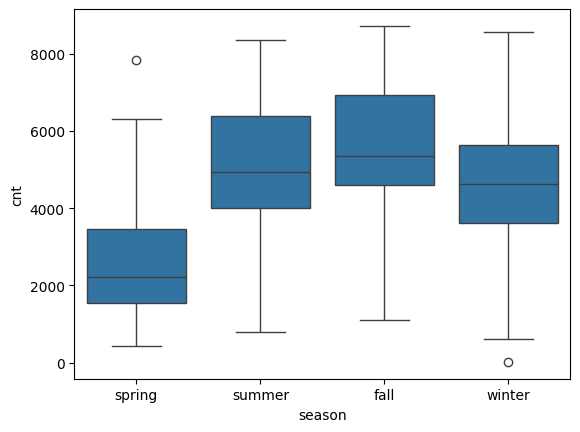

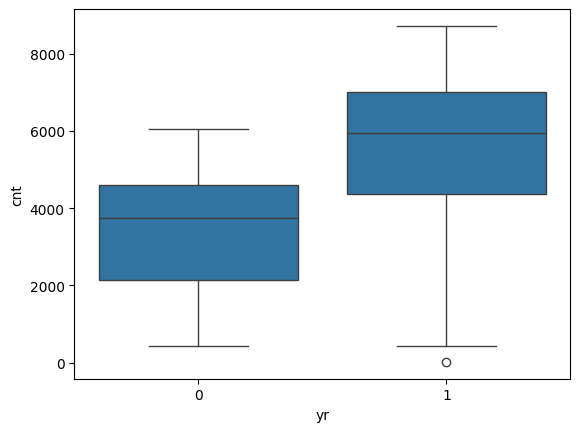

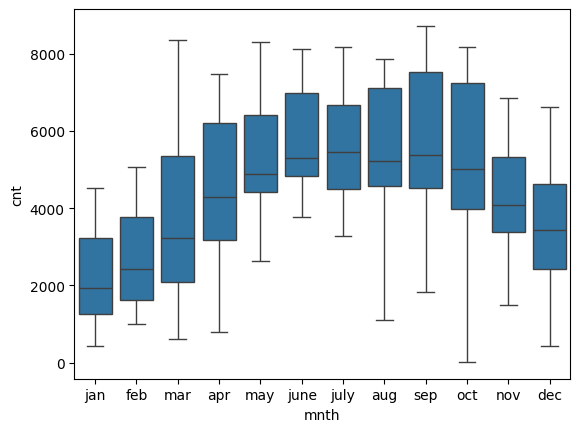

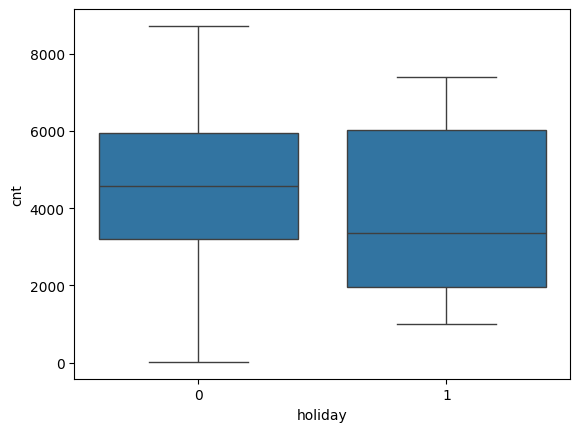

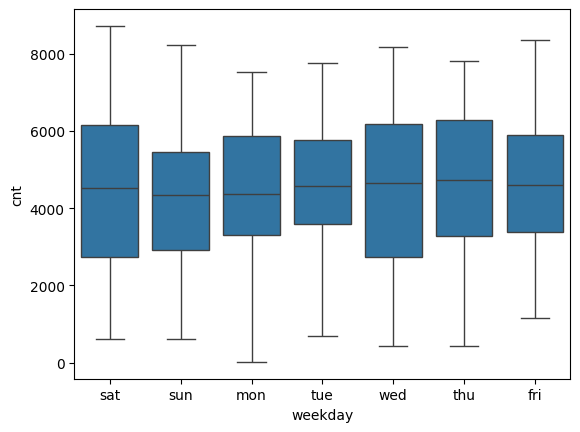

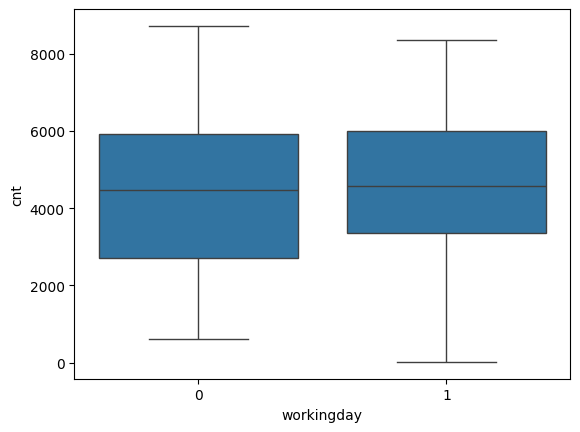

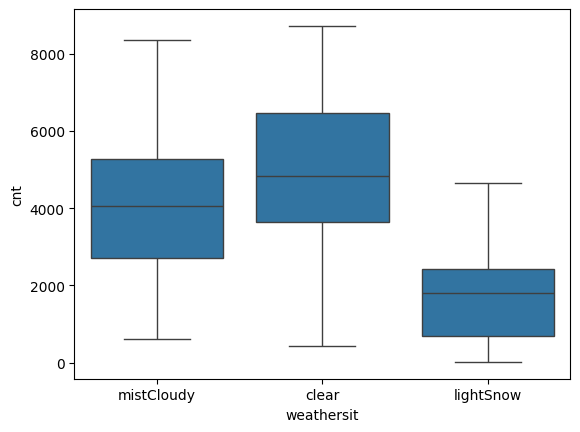

In [78]:
for i in categorical:
    sns.boxplot(x=i,y='cnt',data=bike)
    plt.show()

So we have done analysis on categorical values above and below are few inferences :-

    i) Demand for bikes is more in clear and mistCloud weather as compared to light snow.
    ii) Year 2019 had more bookings 
    iii) During Summer and Fall season, demand for bikes increased
    iv) cnt values lies in wide range during holidays.

Now let's analyze numerical variables

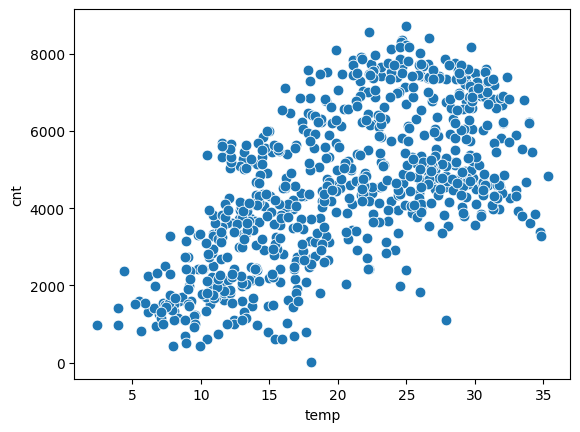

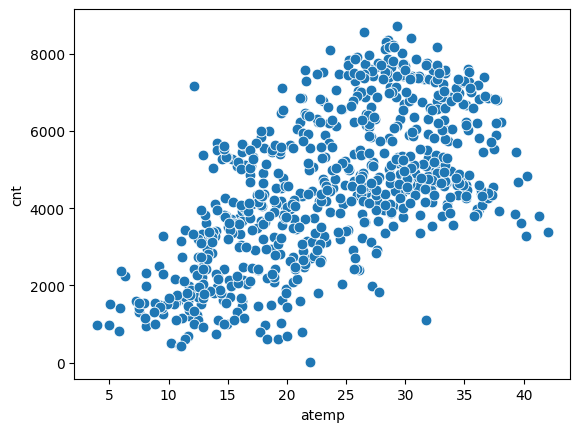

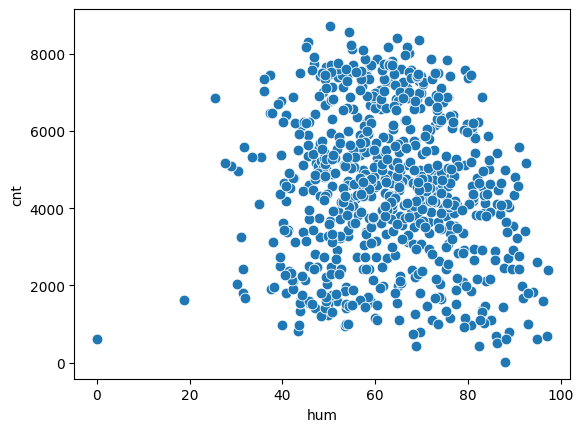

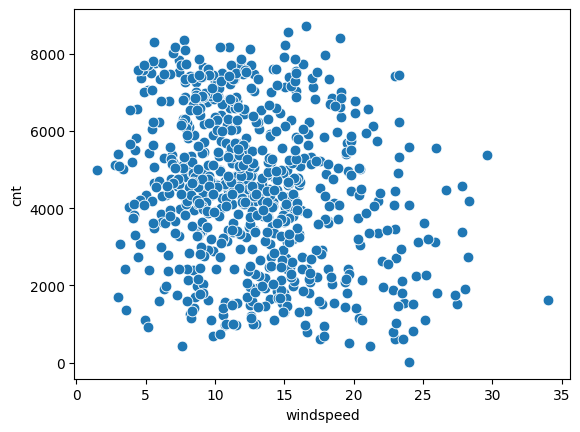

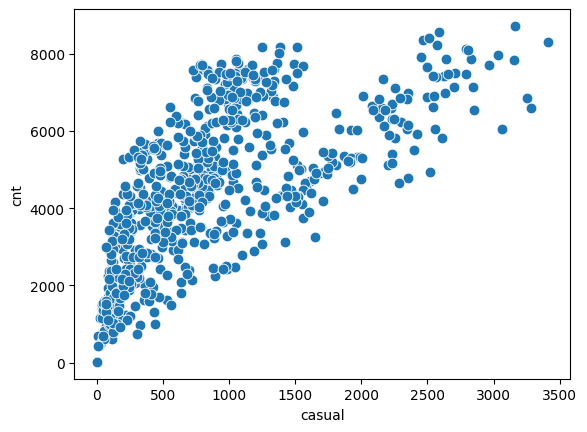

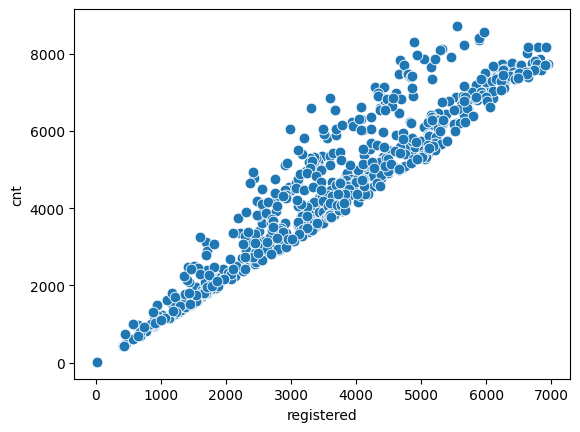

In [79]:
for i in numerical:
    sns.scatterplot(x=i,y='cnt',data=bike,s=60)
    plt.show()

Just through an observation, we can see that 'temp' and 'atemp' are bit more consolidated linearly.

<Figure size 1500x3000 with 0 Axes>

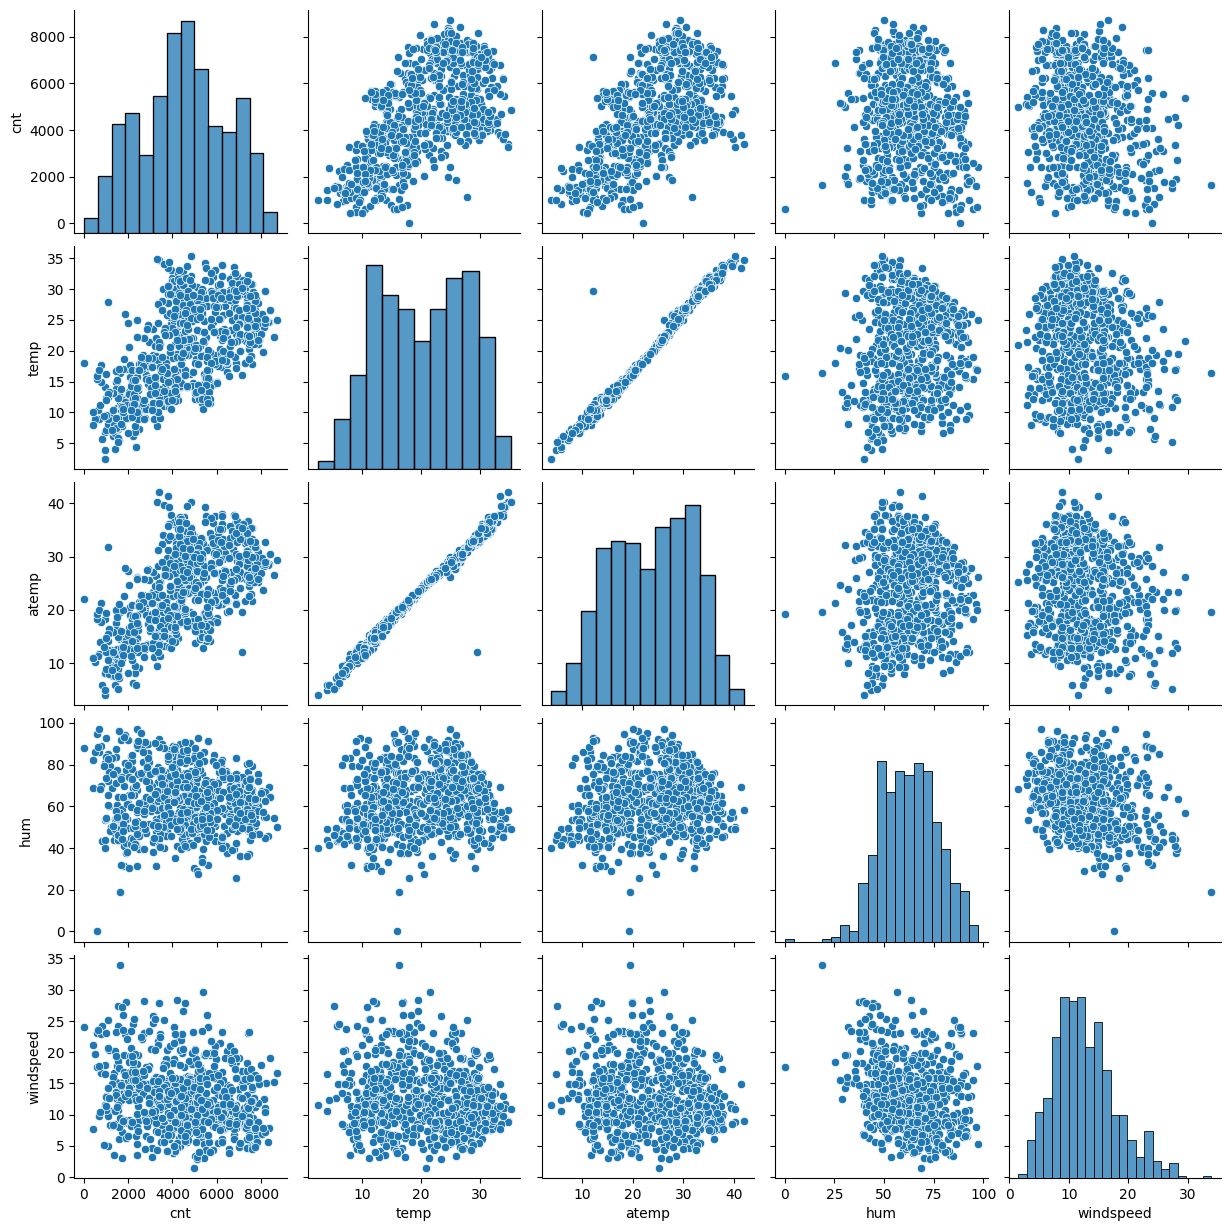

In [80]:
#Holistic visualization view of all variables

plt.figure(figsize = (15,30))
sns.pairplot(data=bike,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

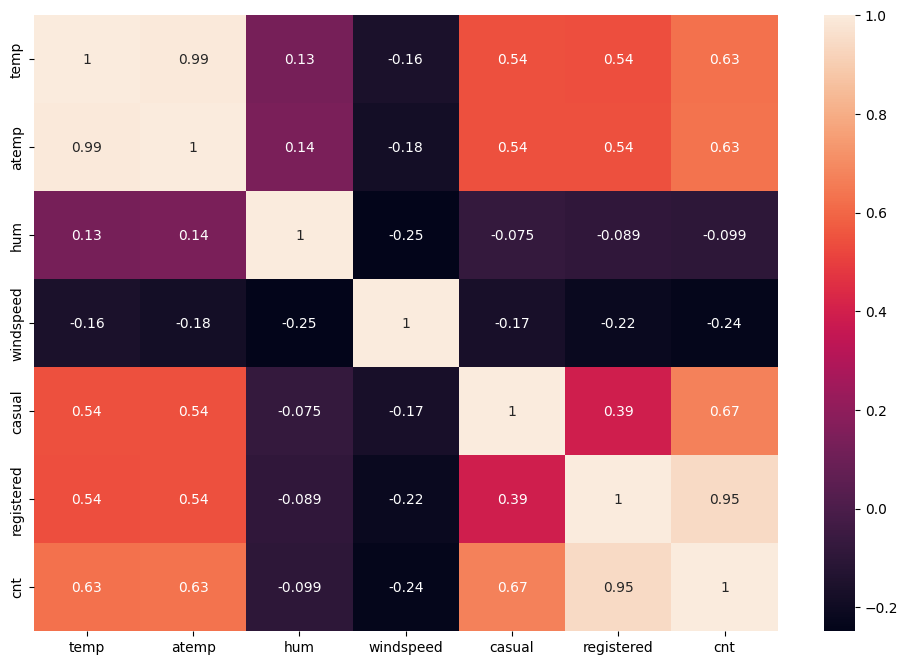

In [81]:
#Checking correlation through HeatMap for numerical variables

plt.figure(figsize = (12, 8))
num_cols=['temp','atemp','hum','windspeed','casual','registered','cnt']
sns.heatmap(bike[num_cols].corr(), annot = True)
plt.show()

Data Cleaning 

Here in the dataset, we saw that 'instant' is just a serial number column and column 'dteday' has no impact on the dependent variable. Moreover, 'cnt' is a sum of 'casual' and 'registered'. 
Thus, we'll drop these 4 columns

In [82]:
bike = bike.drop(['instant','dteday','casual','registered'], axis=1)

In [83]:
bike.shape

(730, 12)

In [84]:
#Checking for any missing values

bike.isna().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

Creating dummy variables for categorical variables

In [85]:
months = pd.get_dummies(bike.mnth,drop_first=True,dtype=int)
weekdays = pd.get_dummies(bike.weekday,drop_first=True,dtype=int)
seasons = pd.get_dummies(bike.season,drop_first=True,dtype=int)
weather = pd.get_dummies(bike.weathersit,dtype=int)

#Here we have added the argument drop_first=True to avoid multicollinearity as we need p-1 dummies for p categories
#weathersit doesn't have any value for heavy rainfall, thus we didn't apply p-1 for it.

In [86]:
bike.shape

(730, 12)

In [87]:
bike = pd.concat([bike, months, weekdays, seasons, weather],axis=1)

In [88]:
bike.shape

(730, 35)

In [89]:
bike.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sun,thu,tue,wed,spring,summer,winter,clear,lightSnow,mistCloudy
0,spring,0,jan,0,sat,0,mistCloudy,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,0,1
1,spring,0,jan,0,sun,0,mistCloudy,14.902598,17.68695,69.6087,...,1,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,...,0,0,1,0,1,0,0,1,0,0
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,...,0,0,0,1,1,0,0,1,0,0
5,spring,0,jan,0,thu,1,clear,8.378268,11.66045,51.8261,...,0,1,0,0,1,0,0,1,0,0
6,spring,0,jan,0,fri,1,mistCloudy,8.057402,10.44195,49.8696,...,0,0,0,0,1,0,0,0,0,1
7,spring,0,jan,0,sat,0,mistCloudy,6.765000,8.11270,53.5833,...,0,0,0,0,1,0,0,0,0,1
8,spring,0,jan,0,sun,0,clear,5.671653,5.80875,43.4167,...,1,0,0,0,1,0,0,1,0,0
9,spring,0,jan,0,mon,1,clear,6.184153,7.54440,48.2917,...,0,0,0,0,1,0,0,1,0,0


In [90]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  aug         730 non-null    int32  
 13  dec         730 non-null    int32  
 14  feb         730 non-null    int32  
 15  jan         730 non-null    int32  
 16  july        730 non-null    int32  
 17  june        730 non-null    int32  
 18  mar         730 non-null    int32  
 19  may         730 non-null    i

After dummy variables have been added to the dataset, we'll drop the original columns

In [91]:
bike_sharing = bike.copy()

In [92]:
bike_sharing.drop(['season','mnth','weekday','weathersit'], inplace=True, axis=1)

In [94]:
bike_sharing.shape

(730, 31)

In [95]:
bike_sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sun,thu,tue,wed,spring,summer,winter,clear,lightSnow,mistCloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,1,1,0,0,1,0,0


We are done with the datacleaning and analysis part for both categorical and numerical variables.
Now we can proceed with Train Test split

In [96]:
X_train, X_test = train_test_split(bike_sharing, train_size=0.8, test_size=0.2, random_state=100)

In [97]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sun,thu,tue,wed,spring,summer,winter,clear,lightSnow,mistCloudy
367,1,0,1,6.150000,6.31375,44.1250,24.499957,2236,0,0,...,0,0,1,0,1,0,0,1,0,0
648,1,0,1,17.835000,21.55835,46.3333,12.166932,7570,0,0,...,0,1,0,0,0,0,1,1,0,0
44,0,0,1,17.015000,19.91750,37.5833,27.999836,1913,0,0,...,0,0,0,0,1,0,0,1,0,0
705,1,0,1,13.154153,16.09790,76.4167,8.750200,5008,0,1,...,0,0,0,0,0,0,1,0,0,1
379,1,0,0,6.833347,8.08125,41.9167,16.834286,2311,0,0,...,1,0,0,0,1,0,0,1,0,0


In [98]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, 367 to 520
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          584 non-null    int64  
 1   holiday     584 non-null    int64  
 2   workingday  584 non-null    int64  
 3   temp        584 non-null    float64
 4   atemp       584 non-null    float64
 5   hum         584 non-null    float64
 6   windspeed   584 non-null    float64
 7   cnt         584 non-null    int64  
 8   aug         584 non-null    int32  
 9   dec         584 non-null    int32  
 10  feb         584 non-null    int32  
 11  jan         584 non-null    int32  
 12  july        584 non-null    int32  
 13  june        584 non-null    int32  
 14  mar         584 non-null    int32  
 15  may         584 non-null    int32  
 16  nov         584 non-null    int32  
 17  oct         584 non-null    int32  
 18  sep         584 non-null    int32  
 19  mon         584 non-null    int3

In [99]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sun,thu,tue,wed,spring,summer,winter,clear,lightSnow,mistCloudy
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.667808,20.107433,23.500998,63.028458,12.790642,4505.267123,0.090753,0.087329,...,0.154110,0.135274,0.133562,0.154110,0.251712,0.246575,0.250000,0.630137,0.027397,0.342466
std,0.500241,0.163378,0.471403,7.414450,8.062524,13.995222,5.239391,1958.617712,0.287504,0.282558,...,0.361363,0.342309,0.340472,0.361363,0.434369,0.431387,0.433384,0.483181,0.163378,0.474941
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.615413,16.592913,52.000000,9.041851,3070.250000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.363326,24.163125,63.437500,12.020905,4566.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.658538,30.256325,73.010425,15.625154,6035.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.250000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
X_train.shape

(584, 31)

In [101]:
X_test.shape

(146, 31)

Here, we see that for variables 'temp', 'atemp', 'hum', 'windspeed' and 'cnt' have extreme values. 
Thus, we'll apply Normalisation here

In [102]:
scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','cnt']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [103]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sun,thu,tue,wed,spring,summer,winter,clear,lightSnow,mistCloudy
367,1,0,1,0.113228,0.061963,0.454701,0.695175,0.254717,0,0,...,0,0,1,0,1,0,0,1,0,0
648,1,0,1,0.468352,0.462175,0.477458,0.299450,0.868385,0,0,...,0,1,0,0,0,0,1,1,0,0
44,0,0,1,0.443431,0.419099,0.387290,0.807474,0.217556,0,0,...,0,0,0,0,1,0,0,1,0,0
705,1,0,1,0.326094,0.318824,0.787463,0.189819,0.573631,0,1,...,0,0,0,0,0,0,1,0,0,1
379,1,0,0,0.133996,0.108365,0.431945,0.449210,0.263346,0,0,...,1,0,0,0,1,0,0,1,0,0


In [104]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sun,thu,tue,wed,spring,summer,winter,clear,lightSnow,mistCloudy
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.667808,0.537414,0.513175,0.649499,0.319463,0.515792,0.090753,0.087329,...,0.154110,0.135274,0.133562,0.154110,0.251712,0.246575,0.250000,0.630137,0.027397,0.342466
std,0.500241,0.163378,0.471403,0.225336,0.211663,0.144219,0.168114,0.225336,0.287504,0.282558,...,0.361363,0.342309,0.340472,0.361363,0.434369,0.431387,0.433384,0.483181,0.163378,0.474941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340113,0.331819,0.535852,0.199177,0.350696,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545191,0.530558,0.653714,0.294764,0.522837,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.736512,0.690521,0.752361,0.410413,0.691872,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.250000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


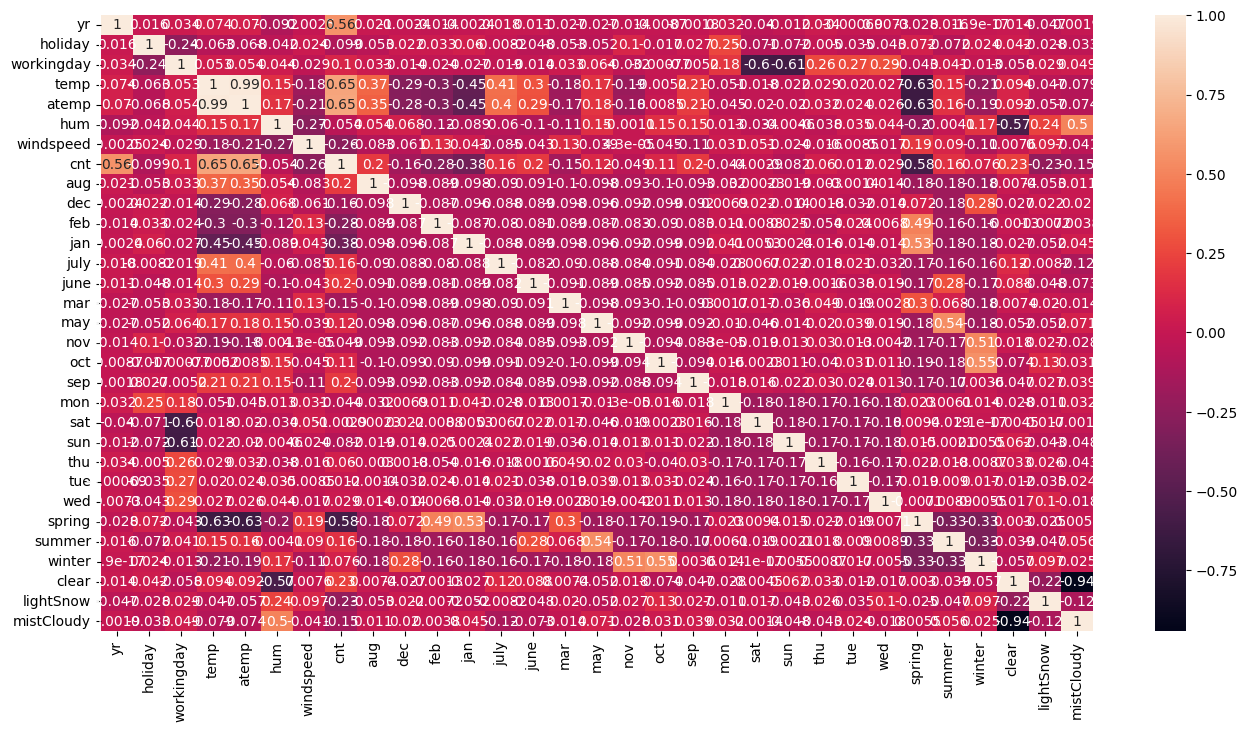

In [105]:
#Now let's check coeffecient correlation to see which are highly correlated

plt.figure(figsize=(16,8))
sns.heatmap(X_train.corr(), annot=True)
plt.show()


In [106]:
#Separating the 'cnt' variable for model building

y_train = X_train.pop('cnt')
X_train1 = X_train

Now, we'll proceed with Model Building. 
To analyze the performance of the model, we'll first add all the variables and then drop one by one based on p-value and VIF

In [107]:
#Importing the statsmodel library

import statsmodels.api as sm

In [109]:
X_train1_lm = sm.add_constant(X_train1)
lr = sm.OLS(y_train,X_train1_lm).fit().summary()
print(lr)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     120.3
Date:                Tue, 06 Aug 2024   Prob (F-statistic):          3.26e-215
Time:                        17:17:31   Log-Likelihood:                 613.26
No. Observations:                 584   AIC:                            -1169.
Df Residuals:                     555   BIC:                            -1042.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1229      0.028      4.428      0.0

In [110]:
#Now to calculate the VIF

def calculate_VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X_train1.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X_train1.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif


In [111]:
calculate_VIF(X_train1)

,Features,VIF
29,mistCloudy,inf
1,holiday,inf
2,workingday,inf
28,lightSnow,inf
27,clear,inf
20,sun,inf
19,sat,inf
3,temp,71.81
4,atemp,61.58
24,spring,10.84


Here, we observed that 'holiday' has infinite VIF and also p-value is considerably high (0.321)
This means holiday has high collinearity with other columns

In [112]:
X_train_copy = X_train1.copy()

In [113]:
X_train_copy

,yr,holiday,workingday,temp,atemp,hum,windspeed,aug,dec,feb,...,sun,thu,tue,wed,spring,summer,winter,clear,lightSnow,mistCloudy
367,1,0,1,0.113228,0.061963,0.454701,0.695175,0,0,0,...,0,0,1,0,1,0,0,1,0,0
648,1,0,1,0.468352,0.462175,0.477458,0.299450,0,0,0,...,0,1,0,0,0,0,1,1,0,0
44,0,0,1,0.443431,0.419099,0.387290,0.807474,0,0,1,...,0,0,0,0,1,0,0,1,0,0
705,1,0,1,0.326094,0.318824,0.787463,0.189819,0,1,0,...,0,0,0,0,0,0,1,0,0,1
379,1,0,0,0.133996,0.108365,0.431945,0.449210,0,0,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.824359,0.679690,0.187140,1,0,0,...,0,1,0,0,0,0,0,1,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,0,0,1,...,0,0,0,1,1,0,0,1,0,0
350,0,0,0,0.248216,0.223544,0.577930,0.431816,0,1,0,...,0,0,0,0,0,0,1,0,0,1
79,0,0,1,0.462664,0.434043,0.759870,0.529881,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [114]:
X1 = X_train_copy.drop('holiday', axis=1)

In [115]:
X1_lm = sm.add_constant(X1)
log = sm.OLS(y_train,X1_lm).fit().summary()
print(log)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     120.3
Date:                Tue, 06 Aug 2024   Prob (F-statistic):          3.26e-215
Time:                        19:25:47   Log-Likelihood:                 613.26
No. Observations:                 584   AIC:                            -1169.
Df Residuals:                     555   BIC:                            -1042.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1074      0.038      2.831      0.0

In [121]:
def calculate_VIF_(X):
    vif = pd.DataFrame()
    vif['Features'] = X1.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X1.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

In [122]:
calculate_VIF_(X1)

,Features,VIF
26,clear,112.95
2,temp,71.81
28,mistCloudy,67.33
3,atemp,61.58
23,spring,10.84
1,workingday,9.38
25,winter,8.86
24,summer,8.33
19,sun,7.30
18,sat,7.19


Now, from the above results we can verify that no variable has now infinite VIF and the VIF is calculated to be 112.95. 

Now for the next few steps, the approach would be to check the p-value and VIF and drop columns one by one for better accuracy.

In [123]:
# Variable 'clear' has high VIF value but p-value is low. Let's check for other variable. 'atemp' has high VIF 61.58 and p-value is 0.610.
#Thus, we will drop atemp columun

X1 = X1.drop('atemp', axis=1)

In [125]:
X1_lm = sm.add_constant(X1)
log = sm.OLS(y_train,X1_lm).fit().summary()
print(log)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     125.0
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          3.29e-216
Time:                        10:19:14   Log-Likelihood:                 613.13
No. Observations:                 584   AIC:                            -1170.
Df Residuals:                     556   BIC:                            -1048.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1065      0.038      2.811      0.0

From the above result we can see that Adjusted R-square has marginally increased and it's difference between R-square has reduced

In [127]:
calculate_VIF_(X1)

,Features,VIF
25,clear,112.82
27,mistCloudy,67.24
22,spring,10.82
1,workingday,9.35
24,winter,8.83
23,summer,8.31
18,sun,7.24
17,sat,7.14
2,temp,7.01
26,lightSnow,6.87


Even though 'clear' and 'mistCloudy' have high VIF values though their p-values are less.
So let's select a different variable to drop

In [128]:
#Dropping the spring variable

X1 = X1.drop('spring', axis=1)

In [129]:
X1_lm = sm.add_constant(X1)
log = sm.OLS(y_train,X1_lm).fit().summary()
print(log)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     128.9
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          2.29e-216
Time:                        10:24:46   Log-Likelihood:                 610.93
No. Observations:                 584   AIC:                            -1168.
Df Residuals:                     557   BIC:                            -1050.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0792      0.036      2.227      0.0

R-square is 0.857 and Adjusted R-square is 0.851

In [130]:
calculate_VIF_(X1)

,Features,VIF
24,clear,96.87
26,mistCloudy,58.67
1,workingday,9.33
18,sun,7.24
17,sat,7.13
2,temp,6.86
14,oct,6.83
13,nov,6.39
25,lightSnow,6.24
6,dec,5.75


In [131]:
# Dropping the 'june' variable on the basis of high p-value

X1 = X1.drop('june', axis=1)

In [132]:
X1_lm = sm.add_constant(X1)
log = sm.OLS(y_train,X1_lm).fit().summary()
print(log)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     134.1
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          2.51e-217
Time:                        10:27:54   Log-Likelihood:                 610.67
No. Observations:                 584   AIC:                            -1169.
Df Residuals:                     558   BIC:                            -1056.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0821      0.035      2.324      0.0

In [133]:
calculate_VIF_(X1)

,Features,VIF
23,clear,95.71
25,mistCloudy,57.91
1,workingday,9.31
17,sun,7.22
16,sat,7.11
24,lightSnow,6.16
12,nov,5.87
13,oct,5.85
22,winter,5.45
2,temp,5.38


In [134]:
# Dropping 'nov' on the basis of high P-value and high VIF
X1=X1.drop('nov',axis=1)

In [135]:
X1_lm = sm.add_constant(X1)
log = sm.OLS(y_train,X1_lm).fit().summary()
print(log)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     139.1
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          9.74e-218
Time:                        10:29:03   Log-Likelihood:                 609.05
No. Observations:                 584   AIC:                            -1168.
Df Residuals:                     559   BIC:                            -1059.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0557      0.032      1.739      0.0

In [136]:
calculate_VIF_(X1)

,Features,VIF
22,clear,75.61
24,mistCloudy,47.59
1,workingday,9.12
16,sun,7.11
15,sat,7.01
23,lightSnow,5.33
2,temp,4.48
21,winter,3.42
20,summer,3.35
8,jan,3.21


Now, we are observing that VIF is gradually decreasing

In [137]:
# Dropping 'mar' on the basis of high P-value
X1=X1.drop('mar',axis=1)

In [138]:
X1_lm = sm.add_constant(X1)
log = sm.OLS(y_train,X1_lm).fit().summary()
print(log)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     145.4
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          7.98e-219
Time:                        10:32:13   Log-Likelihood:                 609.05
No. Observations:                 584   AIC:                            -1170.
Df Residuals:                     560   BIC:                            -1065.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0557      0.031      1.815      0.0

In [139]:
calculate_VIF_(X1)

,Features,VIF
21,clear,68.22
23,mistCloudy,43.71
1,workingday,9.07
15,sun,7.09
14,sat,6.98
22,lightSnow,5.05
2,temp,3.86
19,summer,2.94
20,winter,2.61
9,july,2.22


In [140]:
# Dropping 'sun' on the basis of high P-value
X1=X1.drop('sun',axis=1)

In [141]:
X1_lm = sm.add_constant(X1)
log = sm.OLS(y_train,X1_lm).fit().summary()
print(log)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     151.7
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          1.61e-219
Time:                        10:32:54   Log-Likelihood:                 608.09
No. Observations:                 584   AIC:                            -1170.
Df Residuals:                     561   BIC:                            -1070.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0792      0.025      3.110      0.0

In [142]:
calculate_VIF_(X1)

,Features,VIF
20,clear,42.77
22,mistCloudy,30.15
21,lightSnow,3.91
2,temp,3.85
18,summer,2.93
19,winter,2.61
1,workingday,2.47
5,aug,2.22
9,july,2.22
8,jan,2.17


In [143]:
X1.shape

(584, 23)

In [144]:
# Dropping 'july' on the basis of high P-value
X1=X1.drop('july',axis=1)

In [145]:
X1_lm = sm.add_constant(X1)
log = sm.OLS(y_train,X1_lm).fit().summary()
print(log)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     159.1
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          1.38e-220
Time:                        10:34:25   Log-Likelihood:                 607.99
No. Observations:                 584   AIC:                            -1172.
Df Residuals:                     562   BIC:                            -1076.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0792      0.025      3.113      0.0

In [146]:
calculate_VIF_(X1)

,Features,VIF
19,clear,42.75
21,mistCloudy,30.15
20,lightSnow,3.91
2,temp,2.79
18,winter,2.49
1,workingday,2.47
17,summer,2.27
8,jan,2.17
3,hum,2.01
16,wed,1.78


In [147]:
# Dropping 'wed' on the basis of high P-value
X1=X1.drop('wed',axis=1)

In [148]:
X1_lm = sm.add_constant(X1)
log = sm.OLS(y_train,X1_lm).fit().summary()
print(log)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     167.0
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          1.67e-221
Time:                        10:35:24   Log-Likelihood:                 607.51
No. Observations:                 584   AIC:                            -1173.
Df Residuals:                     563   BIC:                            -1081.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0789      0.025      3.101      0.0

In [149]:
calculate_VIF_(X1)

,Features,VIF
18,clear,42.75
20,mistCloudy,30.14
19,lightSnow,3.90
2,temp,2.79
17,winter,2.49
16,summer,2.27
8,jan,2.16
3,hum,2.01
1,workingday,1.86
7,feb,1.74


Now, we have dropped a few columns. The VIF remains the same for 'clear' and 'mistCloudy'.
The value of R-square and adjusted R-square is 0.856 and 0.851 respectively

Nowe, we can drop the 'clear' variable as it has a significant high VIF

In [150]:
X1=X1.drop('clear',axis=1)

In [151]:
X1_lm = sm.add_constant(X1)
log = sm.OLS(y_train,X1_lm).fit().summary()
print(log)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     167.0
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          1.67e-221
Time:                        10:41:28   Log-Likelihood:                 607.51
No. Observations:                 584   AIC:                            -1173.
Df Residuals:                     563   BIC:                            -1081.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2117      0.030      7.133      0.0

In [152]:
calculate_VIF_(X1)

,Features,VIF
3,hum,24.97
2,temp,14.79
1,workingday,5.30
4,windspeed,4.16
17,winter,3.09
16,summer,2.85
19,mistCloudy,2.23
0,yr,2.10
8,jan,1.96
10,oct,1.90


One thing to observe from the above cell output is that after dropping the 'clear' column, the VIF of 'mistCloudy' has dropped significantly.
Now we'll drop the 'thu' cloumn as it has high p-value

In [153]:
X1=X1.drop('thu',axis=1)

In [154]:
X1_lm = sm.add_constant(X1)
log = sm.OLS(y_train,X1_lm).fit().summary()
print(log)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     175.9
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          1.67e-222
Time:                        10:45:11   Log-Likelihood:                 607.20
No. Observations:                 584   AIC:                            -1174.
Df Residuals:                     564   BIC:                            -1087.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2106      0.030      7.107      0.0

In [155]:
calculate_VIF_(X1)

,Features,VIF
3,hum,24.96
2,temp,14.79
1,workingday,4.77
4,windspeed,4.16
16,winter,3.09
15,summer,2.85
18,mistCloudy,2.22
0,yr,2.09
8,jan,1.96
10,oct,1.89


In [156]:
# Dropping 'hum' on the basis of high VIF
X1=X1.drop('hum',axis=1)

In [157]:
X1_lm = sm.add_constant(X1)
log = sm.OLS(y_train,X1_lm).fit().summary()
print(log)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     178.9
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          1.35e-219
Time:                        10:46:03   Log-Likelihood:                 597.51
No. Observations:                 584   AIC:                            -1157.
Df Residuals:                     565   BIC:                            -1074.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1272      0.023      5.531      0.0

In [158]:
calculate_VIF_(X1)

,Features,VIF
2,temp,6.74
1,workingday,4.66
3,windspeed,4.12
14,summer,2.68
15,winter,2.55
0,yr,2.09
9,oct,1.89
12,sat,1.76
4,aug,1.62
8,may,1.60


In [159]:
# Dropping 'may' on the basis of high p value
X1=X1.drop('may',axis=1)

In [160]:
X1_lm = sm.add_constant(X1)
log = sm.OLS(y_train,X1_lm).fit().summary()
print(log)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     189.8
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          9.67e-221
Time:                        10:47:54   Log-Likelihood:                 597.51
No. Observations:                 584   AIC:                            -1159.
Df Residuals:                     566   BIC:                            -1080.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1271      0.023      5.558      0.0

In [161]:
calculate_VIF_(X1)

,Features,VIF
2,temp,6.62
1,workingday,4.66
3,windspeed,4.06
14,winter,2.55
13,summer,2.15
0,yr,2.08
8,oct,1.89
11,sat,1.76
4,aug,1.62
16,mistCloudy,1.59


In [162]:
# Dropping 'tue' on the basis of high p value
X1=X1.drop('tue',axis=1)

In [163]:
X1_lm = sm.add_constant(X1)
log = sm.OLS(y_train,X1_lm).fit().summary()
print(log)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     200.5
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          3.82e-221
Time:                        10:48:46   Log-Likelihood:                 595.71
No. Observations:                 584   AIC:                            -1157.
Df Residuals:                     567   BIC:                            -1083.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1274      0.023      5.558      0.0

In [164]:
calculate_VIF_(X1)

,Features,VIF
2,temp,6.61
1,workingday,4.38
3,windspeed,4.06
13,winter,2.55
12,summer,2.15
0,yr,2.08
8,oct,1.89
11,sat,1.76
4,aug,1.62
15,mistCloudy,1.59


In [165]:
# Dropping 'dec' on the basis of high p value
X1=X1.drop('dec',axis=1)

In [166]:
X1_lm = sm.add_constant(X1)
log = sm.OLS(y_train,X1_lm).fit().summary()
print(log)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     212.5
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          1.91e-221
Time:                        10:50:00   Log-Likelihood:                 593.64
No. Observations:                 584   AIC:                            -1155.
Df Residuals:                     568   BIC:                            -1085.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1101      0.021      5.169      0.0

In [167]:
calculate_VIF_(X1)

,Features,VIF
2,temp,6.58
1,workingday,4.29
3,windspeed,4.02
12,winter,2.27
11,summer,2.10
0,yr,2.07
10,sat,1.73
7,oct,1.68
4,aug,1.60
14,mistCloudy,1.57


As we are dropping columns one by one, we are simultaneously monitoring th R-square and Adjusted R-square.
Currently, the R-square and adjusted R-square is 0.849 and 0.845 respectively

In [168]:
# Dropping 'feb' on the basis of high p value
X1=X1.drop('feb',axis=1)

In [169]:
X1_lm = sm.add_constant(X1)
log = sm.OLS(y_train,X1_lm).fit().summary()
print(log)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     227.3
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          2.79e-222
Time:                        10:53:23   Log-Likelihood:                 592.80
No. Observations:                 584   AIC:                            -1156.
Df Residuals:                     569   BIC:                            -1090.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0973      0.019      5.174      0.0

In [170]:
calculate_VIF_(X1)

,Features,VIF
2,temp,6.49
1,workingday,4.17
3,windspeed,3.66
11,winter,2.14
0,yr,2.05
10,summer,1.94
9,sat,1.71
6,oct,1.68
4,aug,1.57
13,mistCloudy,1.56


In [171]:
# Dropping 'mon' on the basis of high p value
X1=X1.drop('mon',axis=1)

In [172]:
X1_lm = sm.add_constant(X1)
log = sm.OLS(y_train,X1_lm).fit().summary()
print(log)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     243.5
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          9.83e-223
Time:                        10:54:23   Log-Likelihood:                 591.03
No. Observations:                 584   AIC:                            -1154.
Df Residuals:                     570   BIC:                            -1093.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0956      0.019      5.078      0.0

In [173]:
calculate_VIF_(X1)

,Features,VIF
2,temp,6.49
1,workingday,4.11
3,windspeed,3.64
10,winter,2.14
0,yr,2.05
9,summer,1.94
8,sat,1.70
6,oct,1.68
4,aug,1.57
12,mistCloudy,1.56


Now we have dropped significant number of columns. The moment when we started, the R-square value was 0.859 and now it is 0.847. We have also decreased the VIF which was 112 initially to 6.49 which is of the 'temp' variable. 

Now let's drop the 'temp' variable as it has the highest VIF currently which is 6.49

In [174]:
# Dropping 'temp' on the basis of high VIF 6.49
X1=X1.drop('temp',axis=1)

In [175]:
calculate_VIF_(X1)

,Features,VIF
1,workingday,3.34
2,windspeed,3.31
9,winter,2.14
0,yr,1.92
8,summer,1.73
5,oct,1.63
11,mistCloudy,1.56
7,sat,1.54
3,aug,1.25
4,jan,1.25


In [176]:
X1_lm = sm.add_constant(X1)
log = sm.OLS(y_train,X1_lm).fit().summary()
print(log)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     119.6
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          4.81e-147
Time:                        10:58:08   Log-Likelihood:                 409.04
No. Observations:                 584   AIC:                            -792.1
Df Residuals:                     571   BIC:                            -735.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3881      0.018     21.132      0.0

The above two cells are having the most important output.

After dropping the 'temp' column, we can see that the VIF is below 4 for all remaining columns. 
However, the R-square value had a steep decline from 0.847 to 0.715 by just dropping one column.

We have acheived the VIF goal, however compromised the accuracy.
Thus, we'll add back the temp column to the dataset

In [177]:
#Creating a new dataset with the remaining columns and temp columns

X2 = X_train_copy[['yr','workingday','windspeed','aug','jan','oct','sep','sat','lightSnow','mistCloudy','summer','winter','temp']]

In [178]:
X2

,yr,workingday,windspeed,aug,jan,oct,sep,sat,lightSnow,mistCloudy,summer,winter,temp
367,1,1,0.695175,0,1,0,0,0,0,0,0,0,0.113228
648,1,1,0.299450,0,0,1,0,0,0,0,0,1,0.468352
44,0,1,0.807474,0,0,0,0,0,0,0,0,0,0.443431
705,1,1,0.189819,0,0,0,0,0,0,1,0,1,0.326094
379,1,0,0.449210,0,1,0,0,0,0,0,0,0,0.133996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,1,0.187140,1,0,0,0,0,0,0,0,0,0.863973
53,0,1,0.111379,0,0,0,0,0,0,0,0,0,0.202618
350,0,0,0.431816,0,0,0,0,1,0,1,0,1,0.248216
79,0,1,0.529881,0,0,0,0,0,0,1,1,0,0.462664


In [179]:
X_train_lm = sm.add_constant(X2)
logreg = sm.OLS(y_train, X_train_lm).fit()
print(logreg.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     243.5
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          9.83e-223
Time:                        11:05:39   Log-Likelihood:                 591.03
No. Observations:                 584   AIC:                            -1154.
Df Residuals:                     570   BIC:                            -1093.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0956      0.019      5.078      0.0

In [180]:
calculate_VIF_(X2)

,Features,VIF
1,workingday,4.11
2,windspeed,3.64
11,mistCloudy,2.14
0,yr,2.05
10,lightSnow,1.94
7,sat,1.70
5,oct,1.68
3,aug,1.57
9,winter,1.56
6,sep,1.34


So, we now have the model with R-square as 0.847 with all variables having p-value less than 0.1 and VIF<5 except for temp variable

Now, let's perform Residual analysis

In [182]:
y_train_count = logreg.predict(X_train_lm)

Text(0.5, 9.444444444444438, 'Errors')

<Figure size 640x480 with 0 Axes>

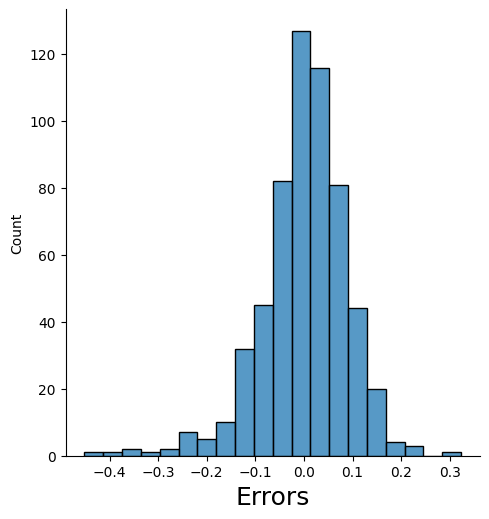

In [183]:
#Let's check with histogram for error terms

fig = plt.figure()
sns.displot((y_train-y_train_count), bins=20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)


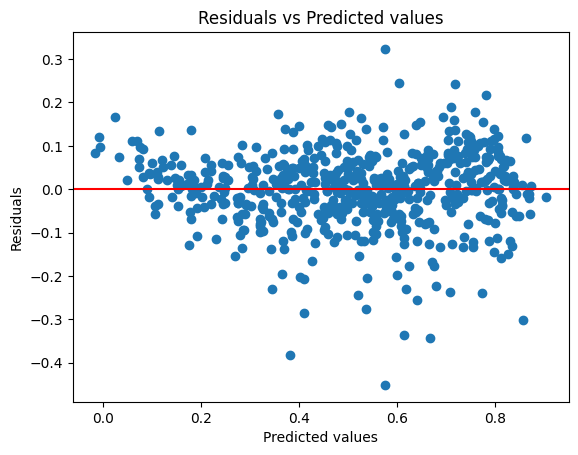

In [184]:
plt.scatter(y_train_count, y_train - y_train_count)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values')
plt.show()

In [185]:
#Normalization using MinMax scaler for test data

scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','cnt']
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])


In [186]:
X_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sun,thu,tue,wed,spring,summer,winter,clear,lightSnow,mistCloudy
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.445205,0.034247,0.746575,0.557681,0.541163,0.505272,0.424295,0.508679,0.061644,0.075342,...,0.102740,0.171233,0.178082,0.089041,0.226027,0.273973,0.219178,0.650685,0.034247,0.315068
std,0.498699,0.182488,0.436469,0.253870,0.232590,0.211227,0.191469,0.234413,0.241335,0.264852,...,0.304664,0.378009,0.383899,0.285783,0.419697,0.447530,0.415114,0.478395,0.182488,0.466142
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.250000,0.333197,0.335903,0.368184,0.283271,0.369724,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.547706,0.543153,0.476798,0.413929,0.499366,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.805408,0.751203,0.633120,0.539098,0.654804,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [187]:
#Dividing X_test and y_test

y_test = X_test.pop('cnt')
X_test1 = X_test

In [188]:
X_test1

,yr,holiday,workingday,temp,atemp,hum,windspeed,aug,dec,feb,...,sun,thu,tue,wed,spring,summer,winter,clear,lightSnow,mistCloudy
184,0,1,0,0.837241,0.778767,0.534223,0.150577,0,0,0,...,0,0,0,0,0,0,0,0,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.232972,0,0,0,...,0,0,0,1,0,1,0,1,0,0
299,0,0,1,0.496221,0.492359,0.777843,0.446910,0,0,0,...,0,1,0,0,0,0,1,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.453268,1,0,0,...,0,0,0,1,0,0,0,1,0,0
152,0,0,1,0.821739,0.749249,0.070765,0.687792,0,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0,0,1,0.888172,0.830814,0.470417,0.432670,1,0,0,...,0,0,0,0,0,0,0,1,0,0
719,1,0,1,0.305782,0.278926,0.421114,0.897003,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,1,0.137486,0.155708,0.468123,0.351431,0,0,0,...,0,0,1,0,1,0,0,1,0,0
392,1,0,0,0.291387,0.312756,0.402551,0.480207,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [189]:
X_test_copy = X_test1.copy()

In [190]:
X_test_copy

,yr,holiday,workingday,temp,atemp,hum,windspeed,aug,dec,feb,...,sun,thu,tue,wed,spring,summer,winter,clear,lightSnow,mistCloudy
184,0,1,0,0.837241,0.778767,0.534223,0.150577,0,0,0,...,0,0,0,0,0,0,0,0,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.232972,0,0,0,...,0,0,0,1,0,1,0,1,0,0
299,0,0,1,0.496221,0.492359,0.777843,0.446910,0,0,0,...,0,1,0,0,0,0,1,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.453268,1,0,0,...,0,0,0,1,0,0,0,1,0,0
152,0,0,1,0.821739,0.749249,0.070765,0.687792,0,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0,0,1,0.888172,0.830814,0.470417,0.432670,1,0,0,...,0,0,0,0,0,0,0,1,0,0
719,1,0,1,0.305782,0.278926,0.421114,0.897003,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,1,0.137486,0.155708,0.468123,0.351431,0,0,0,...,0,0,1,0,1,0,0,1,0,0
392,1,0,0,0.291387,0.312756,0.402551,0.480207,0,0,0,...,0,0,0,0,1,0,0,1,0,0


Creating a new dataframe from X_test_copy having same varaibles as in train model dataframe

In [191]:
X4=X_test_copy[['yr','workingday','windspeed','aug','jan','oct','sep','sat','lightSnow','mistCloudy','summer','winter','temp']]

In [192]:
X4

,yr,workingday,windspeed,aug,jan,oct,sep,sat,lightSnow,mistCloudy,summer,winter,temp
184,0,0,0.150577,0,0,0,0,0,0,1,0,0,0.837241
535,1,1,0.232972,0,0,0,0,0,0,0,1,0,0.911423
299,0,1,0.446910,0,0,1,0,0,0,1,0,1,0.496221
221,0,1,0.453268,1,0,0,0,0,0,0,0,0,0.890387
152,0,1,0.687792,0,0,0,0,0,0,0,1,0,0.821739
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0,1,0.432670,1,0,0,0,0,0,0,0,0,0.888172
719,1,1,0.897003,0,0,0,0,0,0,1,0,0,0.305782
3,0,1,0.351431,0,1,0,0,0,0,0,0,0,0.137486
392,1,0,0.480207,0,1,0,0,1,0,0,0,0,0.291387


In [193]:
X_test_lm = sm.add_constant(X4)

In [194]:
y_pred = logreg.predict(X_test_lm)

In [195]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
R2_Squared = round(r2,4)
print(R2_Squared)

0.7476


Thus, we have observed that R2 for training dataset was 0.847 and for testing dataset the R2 value is 0.747

In [196]:
logreg.params

const         0.095625
yr            0.230631
workingday    0.061218
windspeed    -0.159972
aug           0.053549
jan          -0.040982
oct           0.052076
sep           0.112076
sat           0.072192
lightSnow    -0.302247
mistCloudy   -0.083164
summer        0.100521
winter        0.116010
temp          0.500348
dtype: float64

In [197]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test1.shape[0]-1)/(X_test1.shape[0]-X4.shape[1]-1),4)
print(adjusted_r2)

0.7227


Text(0, 0.5, 'y_pred')

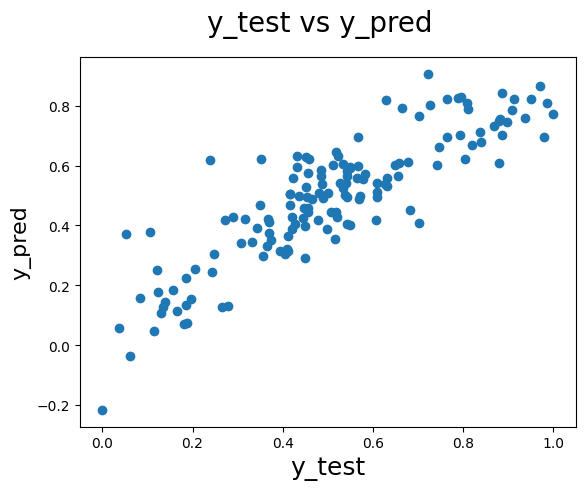

In [198]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_pred', fontsize = 16) 

Final Summary and Conclusion

Let's conclude the assignment with the Linear Regression equation (y=m1x1 +m2x2 +m3x3 +.....+c)

cnt = 0.23*yr + 0.06*workingday + 0.05*aug + 0.05*oct + 0.11*sep + 0.07*sat + 0.1*summer + 0.11*winter + 0.5*temp - 0.16*windspeed - 0.04*jan - 0.302*lightSnow - 0.08*mistCloudy + 0.09

Summary :-

    1. Train dataset R^2 == 0.847
    2. Train dataset adjusted R^2 == 0.844
    3. Test dataset R^2 == 0.747
    4. Test dataset adjusted R^2 == 0.722


Note :- Here, we have used manual method for model evaluation which is VIF and p-value. There is an alternate automated method called RFE (Recursive Feature Elimination)
